In [1]:
# load utils
import sys
sys.path.insert(0, '../utils')
from MagFace_utils.MagFace_funcs_1 import *

In [2]:
df_a_ofiq = pd.read_csv("../data/OFIQ_results/table_adults_all_in_one.csv", sep=";")
df_a_ofiq.columns

Index(['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
       'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
       'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
       'Sharpness', 'CompressionArtifacts', 'NaturalColour',
       'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
       'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
       'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
       'RightwardCropOfTheFaceImage', 'DownwardCropOfTheFaceImage',
       'UpwardCropOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
       'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings',
       'UnifiedQualityScore.scalar', 'BackgroundUniformity.scalar',
       'IlluminationUniformity.scalar', 'LuminanceMean.scalar',
       'LuminanceVariance.scalar', 'UnderExposurePrevention.scalar',
       'OverExposurePrevention.scalar', 'DynamicRange.scalar',
       'Sharpness.scalar', 'CompressionArtifacts.scalar',
  

In [10]:
df_a_ofiq[df_a_ofiq['UnifiedQualityScore.scalar'] > 90]['Filename'][335]


'../../../data/tests/images/adults_full_final/m.017lcg_0001.jpg'

In [12]:
df_a_ofiq[df_a_ofiq['UnifiedQualityScore.scalar'] > 90]['UnifiedQualityScore.scalar'][335]


92

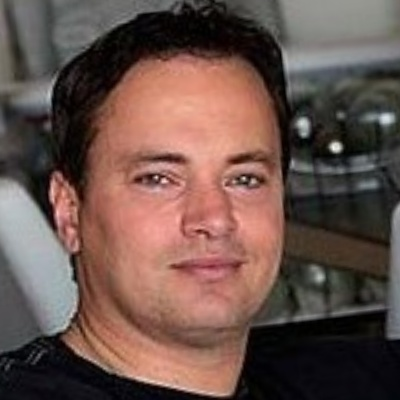

In [13]:
df_a_ofiq[df_a_ofiq['UnifiedQualityScore.scalar'] < 20]['UnifiedQualityScore.scalar'][14]

9

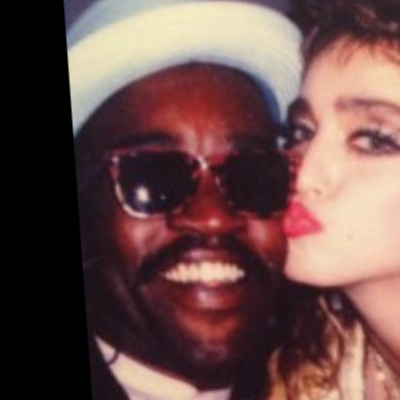

In [19]:
df_a_ofiq.head()

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,RightwardCropOfTheFaceImage.scalar,DownwardCropOfTheFaceImage.scalar,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,Identityname
0,../../../data/tests/images/adults_full_final/m...,22.843954,71.516904,0.499635,0.337319,0.047136,0.198074,0.0,7.576965,50,...,100,58,23,99,99,100,69,0,NaN,m.010g87_0002
1,../../../data/tests/images/adults_full_final/m...,21.374777,37.258586,0.584877,0.221608,0.016571,0.140255,0.0,6.845002,-11,...,100,9,1,100,100,100,36,100,NaN,m.010lz5_0001
2,../../../data/tests/images/adults_full_final/m...,21.944078,31.729164,0.332908,0.114954,0.014525,0.558846,0.0,6.167718,-31,...,100,23,7,76,81,97,34,100,NaN,m.010lz5_0002
3,../../../data/tests/images/adults_full_final/m...,21.284401,97.060087,0.685185,0.162128,0.020428,0.432749,0.0,6.572763,-26,...,100,94,95,99,76,100,49,100,NaN,m.010lz5_0003
4,../../../data/tests/images/adults_full_final/m...,18.683163,64.572584,0.532599,0.343895,0.013737,0.008838,0.0,6.679960,-14,...,100,12,2,100,99,100,51,100,NaN,m.0112yl_0001


In [34]:
import pandas as pd

df_a_ofiq = pd.read_csv("../data/OFIQ_results/table_adults_all_in_one.csv", sep=";")


def extract_identifier(filepath):
    filename = filepath.split('/')[-1]
    parts = filename.split('.')
    if parts[-2].isdigit():
        identifier = '.'.join(parts[-3:-1])
    else:
        identifier = '.'.join(parts[:-1])  # Join everything except the extension
    return identifier

# # Apply the function on the DataFrame column
# df_c_ofiq['Identityname'] = df_c_ofiq['Filename'].apply(extract_identifier)
# df_a_ofiq['Identityname'] = df_a_ofiq['Filename'].apply(extract_identifier)


def compute_std_by_identity(df):
    """
    Computes the standard deviation of 'UnifiedQualityScore' for each identity in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the columns 'Filename' and 'UnifiedQualityScore'.

    Returns:
    pd.DataFrame: DataFrame with each identity and their corresponding standard deviation of UnifiedQualityScore.
    """
    # Ensure the 'Identityname' column is populated based on 'Filename'
    df['Identityname'] = df['Filename'].apply(extract_identifier)
    df['Identityname'] = df['Identityname'].str[:-4]

    # Group by 'Identityname' and calculate standard deviation of 'UnifiedQualityScore'
    result = df.groupby('Identityname')['UnifiedQualityScore.scalar'].std().reset_index()
    result.columns = ['Identityname', 'StdDevOfQualityScore']
    return result

# Example DataFrame creation (you would replace this with your actual DataFrame)
df = df_a_ofiq

# Compute standard deviation for each identity
std_dev_df = compute_std_by_identity(df)
print(std_dev_df)


       Identityname  StdDevOfQualityScore
0         m.010g87_                   NaN
1         m.010lz5_              3.214550
2         m.0112yl_              0.707107
3       m.01167d3z_             21.140404
4         m.011_2h_                   NaN
...             ...                   ...
11344      m.0ywsp_             19.425070
11345    m.0z08d8y_             35.133080
11346  m.0z08d8y_00              4.725816
11347       m.0z1z_             13.976170
11348    m.0zwh1k1_             12.867919

[11349 rows x 2 columns]


In [35]:
std_dev_df.describe()

,StdDevOfQualityScore
count,10973.000000
mean,19.017751
std,10.394029
min,0.000000
25%,10.904892
50%,18.448125
75%,25.967929
max,61.518290


In [36]:
import pandas as pd

def extract_identifier(filepath):
    filename = filepath.split('/')[-1]
    # Split the filename by underscores and join all parts except the last one
    parts = filename.split('_')
    identifier = '_'.join(parts[:-1])  # Join all parts except the last one to form the identifier
    return identifier

# # Apply the function on the DataFrame column
# df_c_ofiq['Identityname'] = df_c_ofiq['Filename'].apply(extract_identifier)
# df_a_ofiq['Identityname'] = df_a_ofiq['Filename'].apply(extract_identifier)


def compute_std_by_identity(df):
    """
    Computes the standard deviation of 'UnifiedQualityScore' for each identity in the DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the columns 'Filename' and 'UnifiedQualityScore'.

    Returns:
    pd.DataFrame: DataFrame with each identity and their corresponding standard deviation of UnifiedQualityScore.
    """
    # Ensure the 'Identityname' column is populated based on 'Filename'
    df['Identityname'] = df['Filename'].apply(extract_identifier)
    # df['Identityname'] = df['Identityname'].str[:-4]

    # Group by 'Identityname' and calculate standard deviation of 'UnifiedQualityScore'
    result = df.groupby('Identityname')['UnifiedQualityScore.scalar'].std().reset_index()
    result.columns = ['Identityname', 'StdDevOfQualityScore']
    return result

# Example DataFrame creation (you would replace this with your actual DataFrame)
df_c_ofiq = pd.read_csv("../data/OFIQ_results/OFIQ_children_all.csv", sep=";")

df = df_c_ofiq

# Compute standard deviation for each identity
std_dev_df = compute_std_by_identity(df)
print(std_dev_df)

     Identityname  StdDevOfQualityScore
0       African_0              0.000000
1       African_1             29.698485
2      African_10             18.839232
3     African_100              5.656854
4     African_101             14.142136
...           ...                   ...
3457    m.0ryvxtg                   NaN
3458    m.0sgqn1_             10.016653
3459    m.0sgqn7h              2.828427
3460    m.0sgy8m8                   NaN
3461    m.0vy1h4f                   NaN

[3462 rows x 2 columns]


In [37]:
std_dev_df.describe()

,StdDevOfQualityScore
count,2634.000000
mean,10.063328
std,7.592605
min,0.000000
25%,4.242641
50%,8.334163
75%,14.142136
max,54.447222
